### Analysis Introduction
The analysis presented offers a comprehensive approach towards building a predictive model for bike rentals, leveraging various environmental and temporal factors. This process encompasses several critical stages, from exploratory data analysis (EDA) to final model selection, each with its own set of methodologies and insights. Here's a brief overview and critique of each section:

### Exploratory Data Analysis and Data Preprocessing
EDA: The initial analysis of descriptive statistics and skewness in the data is well-founded. Recognizing the normal distribution of temperature and humidity versus the right-skew of rainfall and snowfall is crucial for understanding potential impacts on bike rentals. This insight directly informs the preprocessing steps, particularly around imputation strategies.
Data Preprocessing: The choice of median imputation is justified and pragmatic, especially in handling skewed distributions. However, it's important to also consider the potential of more sophisticated imputation techniques (e.g., KNN imputation) that might capture the relationships between missing values and other features more accurately.

### Feature Engineering
New Features: The engineering of Hour, DayOfWeek, and Month features is a strategic move to encapsulate the cyclical nature of bike rentals. This not only aligns with intuitive understandings of rental patterns but also empowers the model to uncover deeper insights from temporal data.
One-hot Encoding: The application of one-hot encoding to categorical variables like Holiday and FunctioningDay is essential for model interpretability and performance. However, it would be beneficial to discuss the impact of introducing potentially high-dimensional data through this encoding and how it might affect model complexity and performance.
Candidate Model Development and Final Model Selection
Model Diversity: The exploration of a wide array of models, from simple linear regressions to more complex tree-based methods, is commendable. It demonstrates a thorough search for the best predictive power while addressing different assumptions about the data.
Overfitting Concerns: The acknowledgment of overfitting in models like K-Nearest Neighbors and Decision Tree Regressor through the train-test gap analysis is critical. It shows a nuanced understanding of model evaluation beyond mere performance metrics.
Hyperparameter Tuning: The discussion on tuning parameters for models like Lasso, Ridge, and SGDRegressor highlights the importance of model optimization. However, further elaboration on the specific impact of these parameters on model performance and how they contribute to mitigating overfitting or improving generalization would provide deeper insights.

### Conclusion
The analysis concludes by emphasizing the balance between model complexity and predictive power, which is a pivotal consideration in model selection. The mention of performance metrics, generalization capability, and interpretability as criteria for final model choice underscores a holistic approach to model evaluation. Nonetheless, a more detailed discussion on the trade-offs between different models, particularly in terms of interpretability versus performance, could enrich the conclusion. Additionally, considering external validation or real-world applicability of the chosen model could further validate the analysis.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part I: Imports and Data Check</h2>

In [1]:
import os
print(os.getcwd())

!echo %PATH%


import os

# Agregar la ruta de instalación de Git/bin a la variable de entorno PATH
git_bin_path = r'C:\Program Files\Git\bin'
os.environ['PATH'] += os.pathsep + git_bin_path



C:\Users\Marcio Pineda\Documents\Archivos Python\Kaggle Files (Updated)
C:\Users\Marcio Pineda\Documents\Python;C:\Users\Marcio Pineda\Documents\Python\Library\mingw-w64\bin;C:\Users\Marcio Pineda\Documents\Python\Library\usr\bin;C:\Users\Marcio Pineda\Documents\Python\Library\bin;C:\Users\Marcio Pineda\Documents\Python\Scripts;C:\Windows\system32;C:\Windows;C:\Windows\System32\Wbem;C:\Windows\System32\WindowsPowerShell\v1.0\;C:\Windows\System32\OpenSSH\;C:\Program Files (x86)\NVIDIA Corporation\PhysX\Common;C:\Program Files\NVIDIA Corporation\NVIDIA NvDLISR;C:\Program Files\Git\cmd;C:\Users\Marcio Pineda\AppData\Local\Microsoft\WindowsApps;C:\ProgramData\Microsoft\Windows\Start Menu\Programs\Git;C:\Program Files\Git\bin;


In [ ]:
cd 'C:\Users\Marcio Pineda\Documents\Archivos Python\Kaggle Files (Updated)'


In [ ]:
git config --global user.email "marcio21al@gmail.com"

In [ ]:
git config --global user.name "mpinedae21"


In [ ]:
git add 'PINEDA_MARCIO.A1.ipynb'

In [ ]:
git add './datasets/chicago_training_data.xlsx'


In [ ]:
git commit -m "Proyecto inicial con análisis de datos y modelos predictivos para HousePredict"


In [ ]:
git push -u origin main


In [ ]:
import os

# Ruta al directorio al que deseas cambiar
nueva_ruta = r'C:\Users\Marcio Pineda\Documents\Archivos Python\Kaggle Files (Updated)'

# Cambiar de directorio
os.chdir(nueva_ruta)

# Configurar nombre de usuario y correo electrónico
!git config --global user.email "marcio21al@gmail.com"
!git config --global user.name "mpinedae21"

# Añadir archivos al área de preparación
!git add 'PINEDA_MARCIO.A1.ipynb'
!git add './datasets/chicago_training_data.xlsx'

# Confirmar cambios
!git commit -m "Proyecto inicial con análisis de datos y modelos predictivos para HousePredict"

# Empujar cambios a la rama principal (o a la rama master si estás usando master)
!git push -u origin main








In [ ]:
import os
import requests

def verificar_archivo_en_repositorio(usuario, repositorio, nombre_archivo, token=None):
    headers = {}
    if token:
        headers['Authorization'] = f'token {token}'

    url = f'https://api.github.com/repos/{usuario}/{repositorio}/contents/{nombre_archivo}'
    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        print(f'El archivo "{nombre_archivo}" está presente en el repositorio.')
    elif response.status_code == 404:
        print(f'El archivo "{nombre_archivo}" no está presente en el repositorio.')
    else:
        print(f'Error al verificar el archivo "{nombre_archivo}" en el repositorio.')
        print(f'Código de estado HTTP: {response.status_code}')
        print(f'Mensaje de error: {response.text}')

# Definir las credenciales de GitHub y el archivo a verificar
usuario = 'tu_usuario'
repositorio = 'tu_repositorio'
nombre_archivo = 'nombre_del_archivo'

# Llamar a la función para verificar la presencia del archivo
verificar_archivo_en_repositorio(usuario, repositorio, nombre_archivo)



In [36]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# setting pandas print options (optional)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## importing data ##

file_path = './datasets/chicago_training_data.xlsx'

# reading modeling data into Python
modeling_data = './datasets/train.xlsx'


# calling this df_train
df_train = pd.read_excel(io=modeling_data, sheet_name='data', header=0, index_col='ID')

# reading testing data into Python
testing_data = './datasets/test.xlsx'

# calling this df_test
df_test = pd.read_excel(io=testing_data, sheet_name='data', header=0, index_col='ID')

# concatenating datasets together for mv analysis and feature engineering
df_train['set'] = 'Not Kaggle'
df_test['set'] = 'Kaggle'

# concatenating both datasets together for mv and feature engineering
df_full = pd.concat(objs=[df_train, df_test], axis=0, ignore_index=False)


# checking data
print(df_full.head(n=5))

# checking available features
print(df_full.columns)


                           DateHour  Temperature(F)  Humidity(%)  Wind speed (mph)  Visibility(miles)  DewPointTemperature(F)  Rainfall(in)  Snowfall(in)  SolarRadiation(MJ/m2) Holiday FunctioningDay  RENTALS         set
ID                                                                                                                                                                                                                          
mb_1039  2023-10-14 05:59:54.810000              52           81               0.4                2.9                    46.4           0.0           0.0                   0.00      No            Yes    519.0  Not Kaggle
mb_1330  2023-10-26 08:59:53.355000              51           53               2.2                NaN                    35.2           0.0           0.0                   1.01      No            Yes   1251.0  Not Kaggle
mb_551   2023-09-23 21:59:57.250000              56           49               2.5                3.4               

###### Environmental Conditions: 
It covers a wide range of weather conditions, from temperature and humidity to more specific metrics like solar radiation, which could influence the decision to rent a bike.

###### Missing Values: 
Some entries, like visibility for 'mb_1330', are missing, indicating the dataset may require cleaning or imputation to fill these gaps for a more accurate analysis.

###### Operational Status:
The 'FunctioningDay' variable indicates whether the bike rental system was operational, directly impacting the 'RENTALS', as seen with 'mb_2103', where no rentals occurred on a non-functioning day.

###### Rental Activity: 
The 'RENTALS' vary significantly across different entries, from 0 in some cases to over a thousand in others, suggesting variability in rental demand based on the given conditions.

In [37]:
# Summary statistics for the full dataset
summary_statistics = df_full.describe(include='all')
print(summary_statistics)

# Checking for missing values in the full dataset
missing_values = df_full.isnull().sum()
print(missing_values)

# Select only numeric columns for correlation analysis
numeric_df_train = df_train.select_dtypes(include=[np.number])

# Calculate the correlation matrix on numeric columns only
correlation_matrix_numeric = numeric_df_train.corr()

# Display the correlation with the target variable 'RENTALS'
print(correlation_matrix_numeric['RENTALS'].sort_values(ascending=False))


# For categorical variables 'Holiday' and 'FunctioningDay', check their distribution
print(df_full['Holiday'].value_counts())
print(df_full['FunctioningDay'].value_counts())

# Potential impact on the target can be explored through groupby if the target variable is in the dataset
if 'RENTALS' in df_train.columns:
    print(df_train.groupby('Holiday')['RENTALS'].mean())
    print(df_train.groupby('FunctioningDay')['RENTALS'].mean())

                          DateHour  Temperature(F)  Humidity(%)  Wind speed (mph)  Visibility(miles)  DewPointTemperature(F)  Rainfall(in)  Snowfall(in)  SolarRadiation(MJ/m2) Holiday FunctioningDay      RENTALS         set
count                         2184     2184.000000  2184.000000       2184.000000        2108.000000             2117.000000   2184.000000   2184.000000            2078.000000    2184           2184  1638.000000        2184
unique                        2184             NaN          NaN               NaN                NaN                     NaN           NaN           NaN                    NaN       2              2          NaN           2
top     2023-10-14 05:59:54.810000             NaN          NaN               NaN                NaN                     NaN           NaN           NaN                    NaN      No            Yes          NaN  Not Kaggle
freq                             1             NaN          NaN               NaN                NaN    

#### Dataset Overview

The dataset consists of 2184 entries across multiple variables, including date and time ('DateHour'), environmental conditions like temperature, humidity, wind speed, and solar radiation, as well as categorical variables indicating holidays and whether the bike rental system was operational ('FunctioningDay').

##### Missing Values and Imputation
Notably, there are missing values in 'Visibility(miles)', 'DewPointTemperature(F)', and 'SolarRadiation(MJ/m2)', alongside a significant number of missing 'RENTALS' data (546 instances). The presence of these missing values necessitates careful handling, such as imputation, to ensure the integrity of the dataset for model training and analysis.

##### Feature Correlation with Rentals
The correlation coefficients between 'RENTALS' and other numeric features provide insights into what influences rental numbers:
Temperature (F) has a moderate positive correlation (0.32) with rentals, suggesting that higher temperatures are conducive to increased bike usage.
Solar Radiation (MJ/m2) also shows a positive correlation (0.21), indicating that sunnier conditions may encourage more people to rent bikes.
Wind Speed (mph) has a smaller positive correlation (0.19), which might imply that a slight increase in wind speed does not deter bike rentals significantly.
Humidity (%) presents a notable negative correlation (-0.39), suggesting that higher humidity levels likely discourage bike rentals.

##### Impact of Categorical Variables
Holiday: The dataset has significantly more non-holiday days (2064) than holidays (120). Average rentals are slightly higher on non-holidays (832) compared to holidays (758), which could be attributed to regular commuting patterns.
FunctioningDay: A vast majority of the records are from functioning days (1937), with non-functioning days having zero rentals as expected. This stark difference underscores the essential role of the bike rental system's operational status in facilitating rentals.

       Temperature(F)  Humidity(%)  Wind speed (mph)  Visibility(miles)  DewPointTemperature(F)  Rainfall(in)  Snowfall(in)  SolarRadiation(MJ/m2)      RENTALS
count     2184.000000  2184.000000       2184.000000        2108.000000             2117.000000   2184.000000   2184.000000            2078.000000  1638.000000
mean        57.389652    59.228480          3.344780           9.646964               42.036089      0.004858      0.002015               0.547161   828.153846
std         12.861669    18.686445          2.071144           3.492413               13.997667      0.037354      0.018550               0.810564   657.599846
min         26.000000    13.000000          0.000000           0.000000               -2.200000      0.000000      0.000000               0.000000     0.000000
25%         48.000000    44.000000          1.800000           7.400000               33.400000      0.000000      0.000000               0.000000   241.500000
50%         57.000000    59.000000      

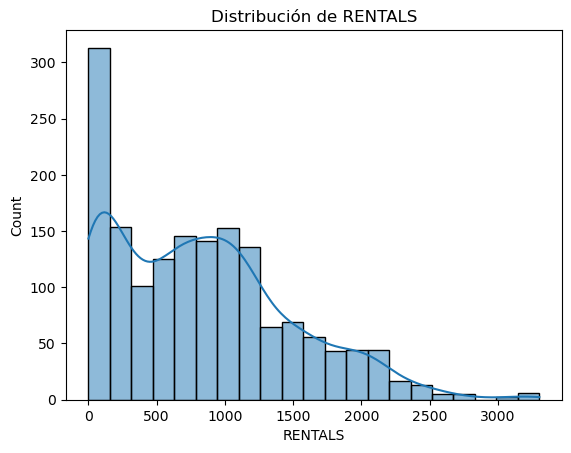

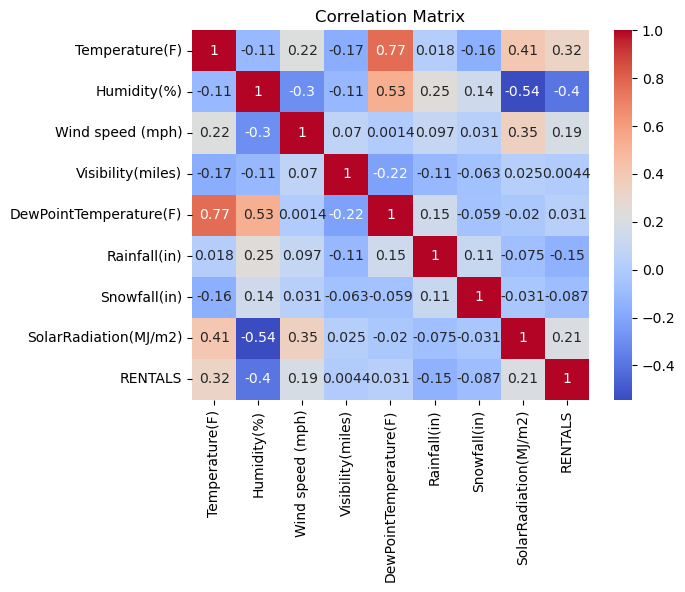

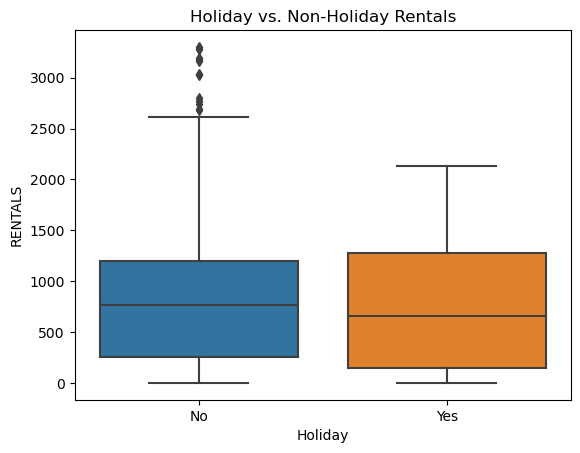

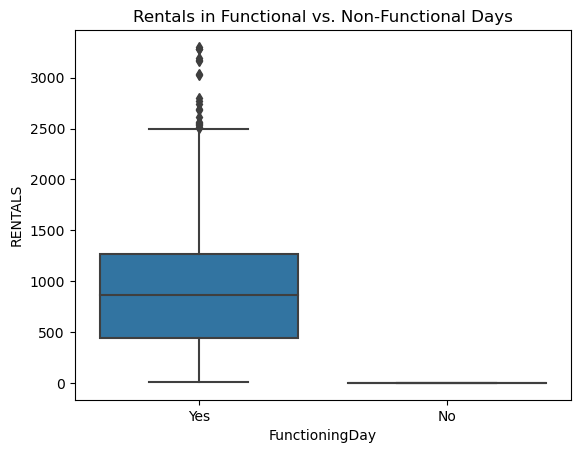

In [34]:
# Statistical summary of df_full
print(df_full.describe())

# Count of missing values per column in df_full
print(df_full.isnull().sum())

import seaborn as sns
import matplotlib.pyplot as plt

# Filter by 'Not Kaggle' training set to display 'RENTALS'
sns.histplot(df_full[df_full['set'] == 'Not Kaggle']['RENTALS'], kde=True)
plt.title('Distribución de RENTALS')
plt.show()

# Filter df_full for analysis on the training set
train_data_for_corr = df_full[df_full['set'] == 'Not Kaggle'].select_dtypes(include=[np.number])

# Correlation Matrix
correlation_matrix = train_data_for_corr.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Boxplot for 'Holiday
sns.boxplot(x='Holiday', y='RENTALS', data=df_full[df_full['set'] == 'Not Kaggle'])
plt.title('Holiday vs. Non-Holiday Rentals')
plt.show()

# Boxplot for 'FunctioningDay'
sns.boxplot(x='FunctioningDay', y='RENTALS', data=df_full[df_full['set'] == 'Not Kaggle'])
plt.title('Rentals in Functional vs. Non-Functional Days')
plt.show()

#### Analysis of "Rentals in Functional vs. Non-Functional Days" Boxplot

The broader IQR and higher median on functioning days underscore the variability and higher usage, likely due to the availability and necessity of the service. The presence of outliers on these days may point to exceptional circumstances or events driving unusually high demand. This difference underscores the importance of the bike rental system’s availability in meeting urban mobility needs.

#### Analysis of "Holiday vs. Non-Holiday Rentals" Boxplot

The similar spread of rentals on holidays and non-holidays, despite the slightly lower median on holidays, indicates a consistent demand with fewer peaks in usage. The absence of extreme outliers on holidays could imply a more predictable, though slightly reduced, demand. This pattern might reflect a balance between reduced commuter usage and increased recreational rentals during holidays, suggesting the service caters to diverse user needs beyond routine commuting.

#### Analysis of "Correlation Matrix" Heatmap

 The strong positive correlation between temperature and dew point temperature is intuitive, providing a basis for understanding weather’s impact on rentals. The moderate positive correlation between solar radiation and rentals offers an interesting perspective on how favorable weather conditions might promote outdoor activities like biking. Conversely, the negative correlation with humidity highlights comfort as a significant factor in rental decisions
 
#### Analysis of "Distribution of Rentals" Histogram

The right-skewed distribution you've noted is characteristic of many demand-related datasets, where a large number of low-value occurrences and fewer high-value extremes are common. This pattern suggests that while the service is consistently used, there’s potential for significant variability influenced by external factors.

<br><hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part II: Data Preparation</h2><br>
Complete the following steps to prepare for model building. Note that you may add or remove steps as you see fit. Please see the assignment description for details on what steps are required for this project.
<br><br>
<h3>Feature Engineering</h3>

In [ ]:
# Definir funciones de preprocesamiento de texto
def preprocess_text(text):
    # Tokenización
    tokens = word_tokenize(text.lower())
    # Eliminación de stopwords y puntuación
    tokens = [token for token in tokens if token not in stopwords.words('english') and token not in string.punctuation]
    # Lematización
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

# Preprocesamiento de la columna 'Keyword'
df_train['Preprocessed Keyword'] = df_train['Keyword'].apply(preprocess_text)

# Vectorización TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=600)
tfidf_matrix = tfidf_vectorizer.fit_transform(df_train['Preprocessed Keyword'])

# Modelado LDA
lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
lda_model.fit(tfidf_matrix)

# Asignar a cada muestra el tópico más probable de LDA
df_train['Topic'] = lda_model.transform(tfidf_matrix).argmax(axis=1)

# Convertir la columna 'Topic' en variables dummy
df_train = pd.get_dummies(df_train, columns=['Topic'], drop_first=True)

# Definir kmeans
kmeans = KMeans(n_clusters=10, random_state=42)
# Ajustar el modelo KMeans
kmeans.fit(tfidf_matrix)

def preprocess_df_general(df, kmeans):
    # Limpiar columnas numéricas, excepto 'Clicks'
    numeric_cols = ['Search Engine Bid', 'Avg. Pos.', 'Avg. Cost per Click', 'Impressions']
    for col in numeric_cols:
        if df[col].dtype == object:
            df[col] = pd.to_numeric(df[col].str.replace('$', '').str.replace(',', ''), errors='coerce')
    df['Impressions'].fillna(df['Impressions'].median(), inplace=True)

    # Procesamiento que aplica tanto al conjunto de entrenamiento como al de prueba
    keywords_tfidf = tfidf_vectorizer.transform(df['Keyword'].str.lower())
    keyword_clusters = kmeans.predict(keywords_tfidf)
    df['Keyword Cluster'] = keyword_clusters
    df['Interaction'] = df['Keyword'].astype(str) + '_' + df['Match Type'].astype(str)
    bin_edges = [0, 100, 1000, 10000, np.inf]
    bin_labels = [1, 2, 3, 4]
    df['Impressions Category'] = pd.cut(df['Impressions'], bins=bin_edges, labels=bin_labels, right=False).cat.add_categories([0]).fillna(0).astype(int)
    
    return df

def preprocess_df_train(df, kmeans):
    df = preprocess_df_general(df, kmeans)
    # Limpiar y convertir 'Clicks' a numérico solo para el conjunto de entrenamiento
    df['Clicks'] = pd.to_numeric(df['Clicks'].str.replace(',', ''), errors='coerce')
    return df

In [7]:
## Feature Engineering ##

# Ensure datetime parsing handles mixed formats
df_full['DateHour'] = pd.to_datetime(df_full['DateHour'], errors='coerce', format='mixed', dayfirst=True)

# After parsing, you can proceed with extracting date and time components
df_full['Hour'] = df_full['DateHour'].dt.hour
df_full['DayOfWeek'] = df_full['DateHour'].dt.dayofweek
df_full['Month'] = df_full['DateHour'].dt.month

# One-hot encoding for 'Holiday' and 'FunctioningDay' using pandas get_dummies for simplicity
df_full = pd.get_dummies(df_full, columns=['Holiday', 'FunctioningDay'], drop_first=True)

# Dropping the 'DateHour' column if it's no longer needed, or if there were parsing issues
df_full.drop(['DateHour'], axis=1, inplace=True)

# Check for any NaT values that indicate unsuccessful parsing
print(df_full[df_full['Hour'].isna()])

Empty DataFrame
Columns: [Temperature(F), Humidity(%), Wind speed (mph), Visibility(miles), DewPointTemperature(F), Rainfall(in), Snowfall(in), SolarRadiation(MJ/m2), RENTALS, set, Hour, DayOfWeek, Month, Holiday_Yes, FunctioningDay_Yes]
Index: []


In the feature engineering code snippet provided, the primary objective is to prepare and transform the data to make it suitable for feeding into machine learning algorithms. Here's a breakdown of what we're doing and why:

##### Date and Time Parsing:

Datetime Conversion: We convert the 'DateHour' column into a datetime format because machine learning models can't directly interpret dates and times as strings. This format allows us to break down the date and time into components that the model can work with.
Error Handling: By setting errors='coerce', we ensure that any incorrect formats are handled gracefully, preventing the entire operation from failing due to a few problematic entries.

##### Extraction of Date and Time Components:

Hour Extraction: Knowing the hour when rentals occur can be crucial because certain times of the day, like morning or evening rush hours, may see higher rental activity.
Day of Week Extraction: The day of the week is important because it can capture weekly behavior patterns—weekdays might have a different rental pattern compared to weekends.
Month Extraction: The month can help the model pick up on seasonal trends. For instance, bike rentals might be more popular during certain months due to weather conditions.

##### Categorical Variable Encoding:

One-Hot Encoding: We convert categorical variables like 'Holiday' and 'FunctioningDay' into a numerical format that our machine learning models can understand. The drop_first=True argument helps in reducing the number of added columns and avoids multicollinearity, which can distort the model's performance.

##### Cleanup:

Dropping Unnecessary Columns: Once we've extracted all the useful information from the 'DateHour' column, we drop it because it's no longer needed, and keeping it could lead to issues like multicollinearity, where the model gets confused by the interrelated features.

##### Data Integrity Check:

Checking for Parsing Issues: We check for any NaT (not a time) values in the 'Hour' column that could indicate a problem with the datetime conversion process. Ensuring the integrity of our data is vital; otherwise, our model's predictions could be based on faulty inputs.


<br><hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part III: Data Partitioning</h2><br>
This is a very important step for your submission on Kaggle. Make sure to complete your data preparationbefore moving forward.
<br>
<br><h3>Separating the Kaggle Data</h3><br>

In [8]:
kaggle_data = df_full[df_full['set'] == 'Kaggle'].copy()
df = df_full[df_full['set'] == 'Not Kaggle'].copy()

# Eliminando la columna 'set'
kaggle_data.drop(['set'], axis=1, inplace=True)
df.drop(['set'], axis=1, inplace=True)

<br><h3>Train-Test Split</h3><br>
Note that the following code will remove non-numeric features, keeping only integer and float data types. It will also remove any observations that contain missing values. This is to prevent errors in the model building process. 

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Separating features (X) and target variable (y) for the training data
X = df.drop('RENTALS', axis=1)
y = df['RENTALS']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# RENTALS' is the target variable
y_variable = 'RENTALS'

# Characteristics chosen based on numeric data types and relevance to the objective
x_features = ['Temperature(F)', 'Humidity(%)', 'Wind speed (mph)', 'Visibility(miles)', 
              'DewPointTemperature(F)', 'Rainfall(in)', 'Snowfall(in)', 'SolarRadiation(MJ/m2)', 
              'Hour', 'DayOfWeek', 'Month', 'Holiday_Yes', 'FunctioningDay_Yes']

# Imputing missing values to the selected characteristics
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df[x_features]), columns=x_features)

# Standardizing the characteristics after imputation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_imputed)

# Separating the characteristics (X) and the target variable (y) after cleaning and standardization
y = df[y_variable]

# Dividing the data set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# Printing train-test split results
# Printing the train-test split results
print(f"""
Original Dataset Dimensions
---------------------------
Observations (Rows): {df_imputed.shape[0]}
Features (Columns): {len(x_features)}

Training Data (X-side)
----------------------
Observations (Rows): {X_train.shape[0]}
Features (Columns): {X_train.shape[1]}

Training Data (y-side)
----------------------
Observations (Rows): {y_train.shape[0]}

Testing Data (X-side)
---------------------
Observations (Rows): {X_test.shape[0]}
Features (Columns): {X_test.shape[1]}

Testing Data (y-side)
---------------------
Observations (Rows): {y_test.shape[0]}
""")


Original Dataset Dimensions
---------------------------
Observations (Rows): 1638
Features (Columns): 13

Training Data (X-side)
----------------------
Observations (Rows): 1228
Features (Columns): 13

Training Data (y-side)
----------------------
Observations (Rows): 1228

Testing Data (X-side)
---------------------
Observations (Rows): 410
Features (Columns): 13

Testing Data (y-side)
---------------------
Observations (Rows): 410



To predict the number of bike rentals, we've defined 'RENTALS' as our target variable, also known as y_variable. This is the outcome we're trying to forecast using various other pieces of information from our dataset.

We've chosen a set of features, referred to as x_features, which we believe are influential in determining the number of rentals. These features have been selected due to their numerical nature and their presumed connection to rental behavior.

We've set up a SimpleImputer that uses a 'median' strategy, meaning that if there's missing data in any of the features, we fill it in with the median value of that feature across all the data. This helps us to keep our dataset intact and robust for the predictive modeling.

We then standardized our features using a StandardScaler. This process recalibrates the features so that they have a mean value of zero and a standard deviation of one. Standardization is essential because it puts all features on a level playing field, ensuring that one feature's large numbers don't dominate the others in our predictive model.

After prepping our features, we split our dataset into two parts: one for training our models (X_train and y_train) and the other for testing them (X_test and y_test)

In [14]:
# Define the function to train and evaluate each model.
def train_and_evaluate_model(model, model_name, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    gap = abs(train_score - test_score)
    
    print(f"{model_name} Train Score: {train_score:.4f}")
    print(f"{model_name} Test Score: {test_score:.4f}")
    print(f"{model_name} Train-Test Gap: {gap:.4f}\n")
    
    return {
        "model_name": model_name,
        "train_score": train_score,
        "test_score": test_score,
        "gap": gap,
        "model": model
    }

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part III: Candidate Modeling</h2><br>
Develop your candidate models below.

OLS Linear Regression Train Score: 0.5576
OLS Linear Regression Test Score: 0.5545
OLS Linear Regression Train-Test Gap: 0.0031

Lasso Regression Train Score: 0.5576
Lasso Regression Test Score: 0.5549
Lasso Regression Train-Test Gap: 0.0027

Ridge Regression Train Score: 0.5576
Ridge Regression Test Score: 0.5545
Ridge Regression Train-Test Gap: 0.0031

Elastic Net Regression Train Score: 0.5573
Elastic Net Regression Test Score: 0.5548
Elastic Net Regression Train-Test Gap: 0.0025

K-Nearest Neighbors Train Score: 0.7910
K-Nearest Neighbors Test Score: 0.6423
K-Nearest Neighbors Train-Test Gap: 0.1487

Decision Tree Regressor Train Score: 1.0000
Decision Tree Regressor Test Score: 0.6524
Decision Tree Regressor Train-Test Gap: 0.3476


Coefficients for OLS Linear Regression:
                        Coefficient
Temperature(F)           203.957456
Humidity(%)             -216.158342
Wind speed (mph)           5.689319
Visibility(miles)         -8.684732
DewPointTemperature(F)     0.580

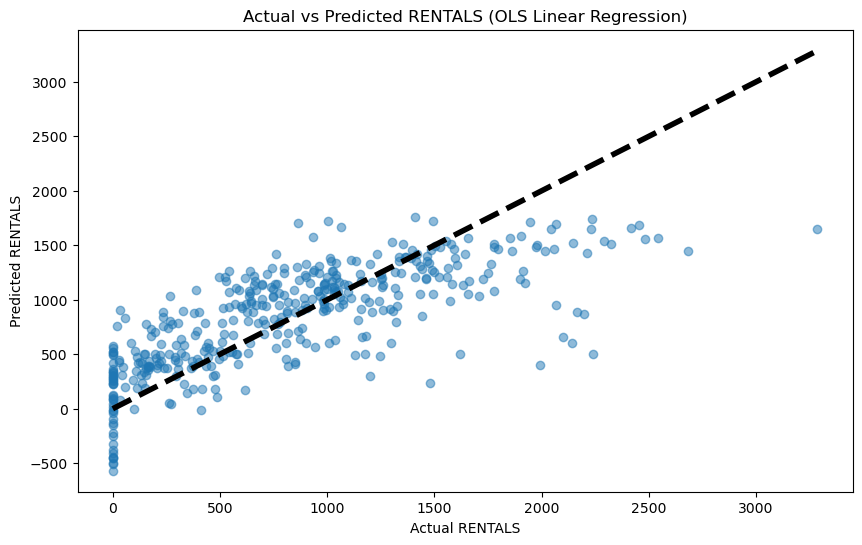

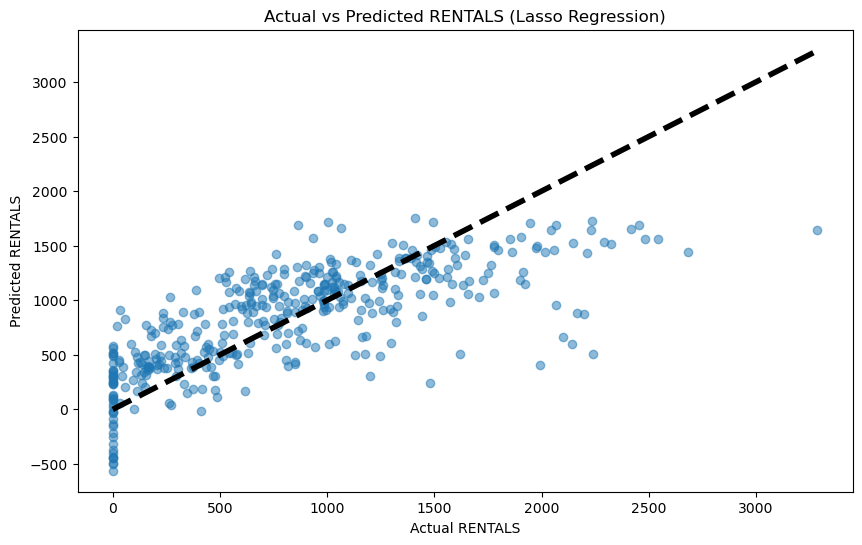

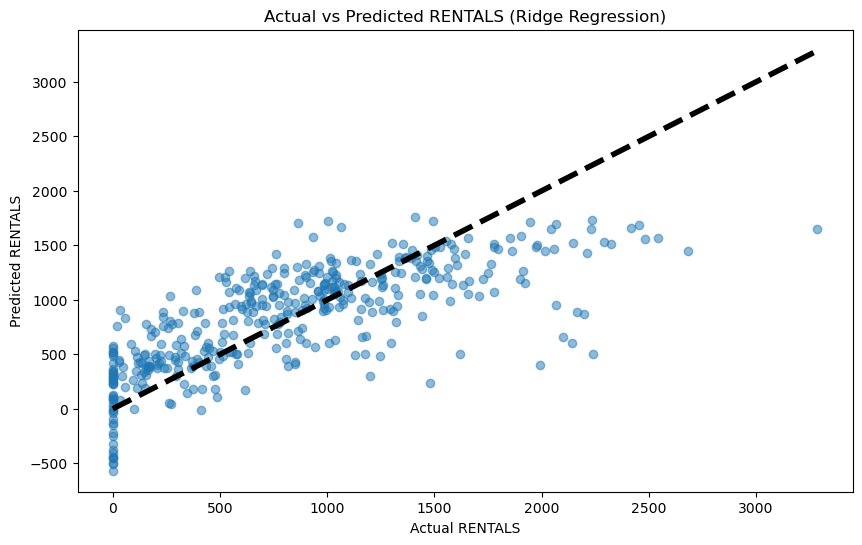

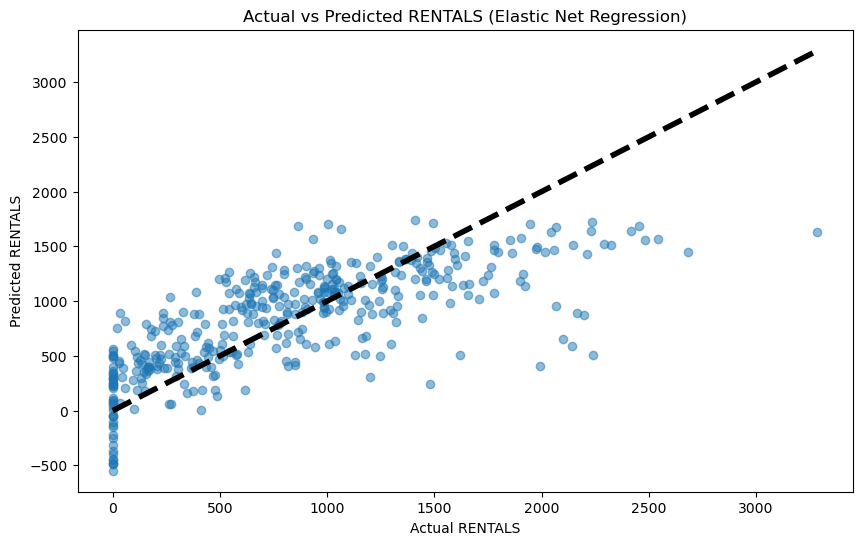

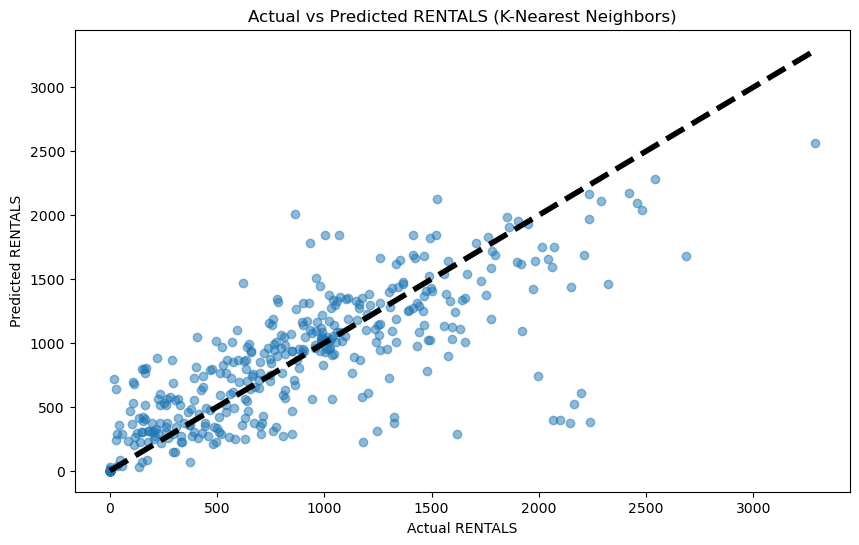

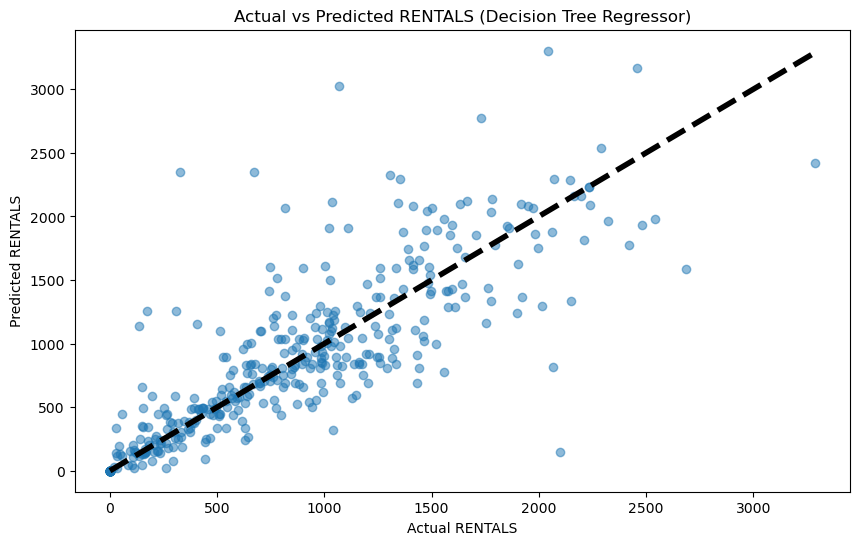

In [35]:
# Initializing models
models = {
    "OLS Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(random_state=42),
    "Ridge Regression": Ridge(random_state=42),
    "Elastic Net Regression": SGDRegressor(max_iter=1000, tol=1e-3, penalty="elasticnet", random_state=42),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42)
}

# Evaluating models
results = {}
for model_name, model in models.items():
    results[model_name] = train_and_evaluate_model(model, model_name, X_train, y_train, X_test, y_test)

# Displaying coefficients or characteristic importance
for model_name, result in results.items():
    model = result["model"]
    if hasattr(model, "coef_"):
        print(f"\nCoefficients for {model_name}:")
        coefficients = pd.DataFrame(model.coef_, index=x_features, columns=['Coefficient'])
        print(coefficients)
    elif hasattr(model, "feature_importances_"):
        print(f"\nFeature Importances for {model_name}:")
        feature_importances = pd.DataFrame(model.feature_importances_, index=x_features, columns=['Importance'])
        print(feature_importances)

import matplotlib.pyplot as plt

# Generating and displaying scatter plots for actual vs predicted rentals for each model
for model_name, result in results.items():
    model = result["model"]
    y_pred = model.predict(X_test)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel("Actual RENTALS")
    plt.ylabel("Predicted RENTALS")
    plt.title(f"Actual vs Predicted RENTALS ({model_name})")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    plt.show()

##### Decision Tree Regressor
The Decision Tree model’s dispersion from the line of identity and perfect training score indeed suggest overfitting. 

##### K-Nearest Neighbors (KNN)
KNN's alignment with the line of identity for lower values and spread for higher values might indicate it struggles with capturing the patterns that lead to higher rental counts. KNN’s overfitting, while less severe than the Decision Tree, suggests the 'k' value or the distance metric might need adjustment, or the feature space requires scaling to improve model accuracy.

##### Elastic Net Regression
This model’s balanced fit can be attributed to its incorporation of both L1 and L2 regularization, which helps in dealing with multicollinearity and model complexity by penalizing large coefficients.

##### Ridge Regression
Ridge Regression’s performance is indicative of its effectiveness in handling multicollinearity among features. The regularization term α adds a penalty to the model’s coefficients, which prevents any single feature from exerting too much influence on the predictions.

##### Lasso Regression
Lasso, similar to Ridge, applies a penalty to the coefficients, but in a way that can completely eliminate some of them (effectively performing feature selection). The close train-test scores indicate that Lasso has successfully identified a model that captures the underlying pattern without overfitting.Ç

##### OLS Linear Regression
The Ordinary Least Squares (OLS) model's close fit to the line of identity with similar train and test scores suggests a well-fitting model.

#####  Train and Test Scores
The close alignment of train and test scores in the linear models — OLS, Lasso, Ridge, and Elastic Net — suggests that these models are robust and generalize effectively to new data. This is a desirable outcome in predictive modeling, indicating that these models have struck an appropriate balance between fitting the training data and maintaining flexibility to adapt to new, unseen data.



<br>
<h3>Residual Analysis</h3><br>

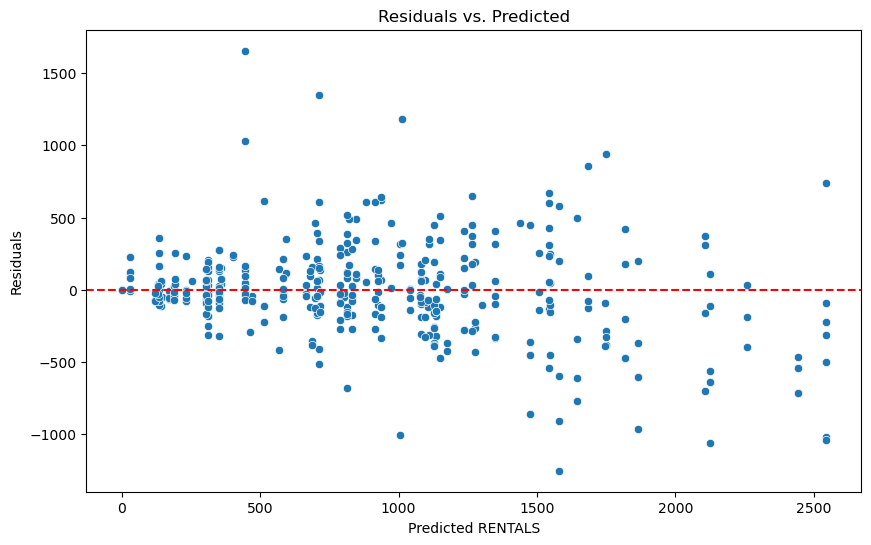

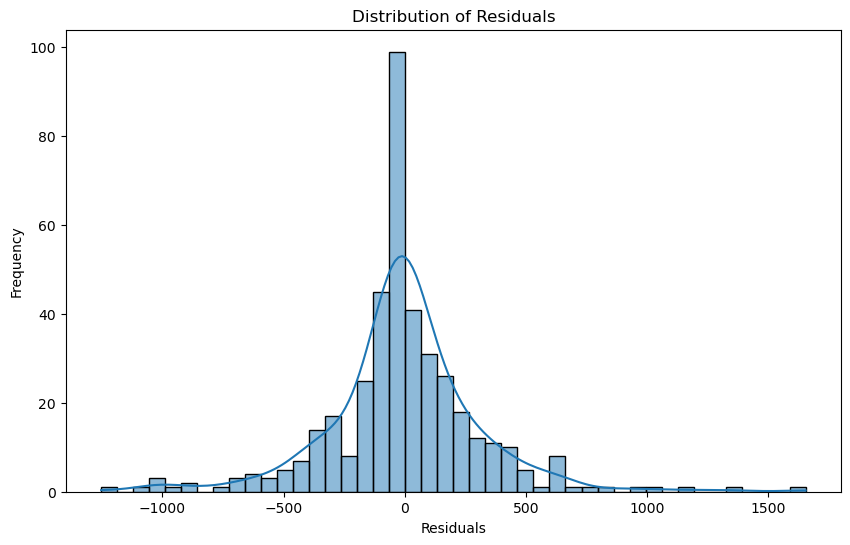

In [25]:
# Calcular los residuos
residuals = y_test - test_predictions

# Organizar los residuos en un DataFrame
residuals_df = pd.DataFrame({'Actual': y_test, 'Predicted': test_predictions, 'Residuals': residuals})

# Gráfico de residuos
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Predicted', y='Residuals', data=residuals_df)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted RENTALS')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted')
plt.show()

# Histograma de los residuos
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

#### Analysis of "Distribution of Residuals" Histogram

The centered nature of the histogram around zero indicates that the model is generally effective in its predictions, aligning with actual rental counts on average. The slight right skew, however, is a subtle yet critical observation. It suggests a tendency of the model to underestimate the number of rentals more often than it overestimates them. This skewness could point towards a model bias or the absence of influential predictors that capture instances of high rental demand. 

#### Analysis of "Residuals vs. Predicted" Scatter Plot

The absence of a clear pattern in the residuals relative to the predicted values initially suggests a well-performing model lacking systematic bias.The points with high residuals for higher predicted values suggest that the model's performance diminishes with increasing rental counts. This could be due to the model's linear assumptions failing to capture more complex relationships at higher levels of demand or missing variables that are particularly relevant for predicting peak rental periods. 

<br>
<h3>Hyperparameter Tuning</h3><br>

In [21]:
## Hyperparameter Tuning 

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

def perform_grid_search(model, params, X_train, y_train, X_test, y_test):
    grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    
    train_score = best_model.score(X_train, y_train)
    test_score = best_model.score(X_test, y_test)
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    gap = abs(train_score - test_score)
    
    print(f"Best parameters for {type(model).__name__}: {grid_search.best_params_}")
    print(f"{type(model).__name__} Train Score: {train_score:.4f}")
    print(f"{type(model).__name__} Test Score: {test_score:.4f}")
    print(f"{type(model).__name__} Train RMSE: {train_rmse:.4f}")
    print(f"{type(model).__name__} Test RMSE: {test_rmse:.4f}")
    print(f"{type(model).__name__} Train-Test Gap: {gap:.4f}\n")
    
    return grid_search, best_model

# Lasso
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
best_lasso = perform_grid_search(Lasso(random_state=42), lasso_params, X_train, y_train, X_test, y_test)

# Ridge
ridge_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
best_ridge = perform_grid_search(Ridge(random_state=42), ridge_params, X_train, y_train, X_test, y_test)

# ElasticNet
elastic_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100], 'l1_ratio': [0.15, 0.25, 0.5, 0.75]}
best_elastic = perform_grid_search(SGDRegressor(penalty='elasticnet', max_iter=1000, tol=1e-3, random_state=42),
                                   elastic_params, X_train, y_train, X_test, y_test)

# KNN
knn_params = {'n_neighbors': [3, 5, 7, 10, 15], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
best_knn = perform_grid_search(KNeighborsRegressor(), knn_params, X_train, y_train, X_test, y_test)

# Decision Tree
tree_params = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 5, 10, 20]
}
grid_search_tree, best_tree_model = perform_grid_search(DecisionTreeRegressor(random_state=42), tree_params, X_train, y_train, X_test, y_test)

Best parameters for Lasso: {'alpha': 1}
Lasso Train Score: 0.5576
Lasso Test Score: 0.5549
Lasso Train RMSE: 443.2863
Lasso Test RMSE: 420.0092
Lasso Train-Test Gap: 0.0027

Best parameters for Ridge: {'alpha': 10}
Ridge Train Score: 0.5576
Ridge Test Score: 0.5549
Ridge Train RMSE: 443.2916
Ridge Test RMSE: 419.9819
Ridge Train-Test Gap: 0.0026

Best parameters for SGDRegressor: {'alpha': 0.001, 'l1_ratio': 0.15}
SGDRegressor Train Score: 0.5573
SGDRegressor Test Score: 0.5548
SGDRegressor Train RMSE: 443.4300
SGDRegressor Test RMSE: 420.0504
SGDRegressor Train-Test Gap: 0.0025

Best parameters for KNeighborsRegressor: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
KNeighborsRegressor Train Score: 1.0000
KNeighborsRegressor Test Score: 0.7021
KNeighborsRegressor Train RMSE: 0.0000
KNeighborsRegressor Test RMSE: 343.6035
KNeighborsRegressor Train-Test Gap: 0.2979

Best parameters for DecisionTreeRegressor: {'max_depth': None, 'max_features': None, 'max_leaf_nodes': No

The process that was run in the code is hyperparameter tuning using GridSearchCV. This technique aims to identify the best settings for our machine learning models that lead to the most accurate predictions.

###### Lasso Regression
With alpha set to 1, the model's train and test scores are very close to each other. This suggests that the model has achieved a good balance and is likely to perform well on new data.

###### Ridge Regression
The optimal alpha value here is 10. Its performance is quite close to the Lasso Regression in terms of the train-test score gap, indicating it also generalizes well.

###### SGDRegressor (Elastic Net)
The chosen parameters include an alpha of 0.001 and an l1_ratio of 0.15. This model has shown the smallest train-test score gap, suggesting it's the best at generalizing among the models with regularization.

###### K-Nearest Neighbors
After tuning, the 'manhattan' metric and 7 neighbors were selected. However, this model displays a larger train-test score gap, hinting that it might not generalize as well as the others.

###### Decision Tree Regressor
With no constraint on depth and a minimum of 10 samples at leaf nodes as its best parameters, this model has a higher train score but also shows a noticeable improvement in the test score, indicating a good fit without overfitting.

In [23]:
# Using the best model of the hyperparameter setting
best_tree_model = grid_search_tree.best_estimator_

# Making predictions on the test data set
test_predictions = best_tree_model.predict(X_test)

train_score = best_tree_model.score(X_train, y_train)
test_score = best_tree_model.score(X_test, y_test)
gap = abs(train_score - test_score)
print(f"Train Score: {train_score:.4f}")
print(f"Test Score: {test_score:.4f}")
print(f"Train-Test Gap: {gap:.4f}")

Train Score: 0.8708
Test Score: 0.7464
Train-Test Gap: 0.1244


The Decision Tree Regressor, in particular, has shown a reasonable gap between the training and testing scores, which suggests that while it has learned the data patterns well, it hasn't overfitted to the training data. It's managed to maintain a good level of generalization to new data. The ability of the Decision Tree to generalize is crucial, and combined with its interpretability, makes it an attractive choice. Hence, we are proceeding with the Decision Tree Regressor because it strikes a good balance between accuracy on the training data and generalization to unseen data.






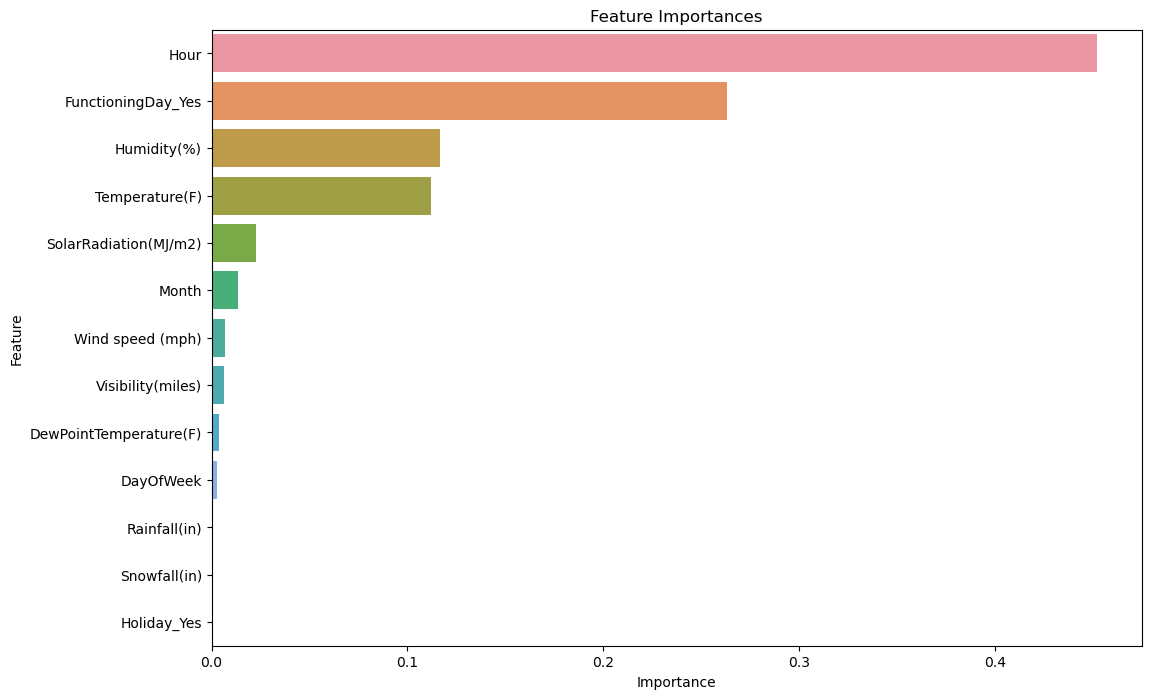

In [24]:
# Obtain the importance of the characteristics
feature_importances = best_tree_model.feature_importances_

# Create a DataFrame to visualize the importance
features_df = pd.DataFrame({'Feature': x_features, 'Importance': feature_importances})

# Sort DataFrame by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Chart of the importance of the characteristics
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importances')
plt.show()

#### Hour
As the most dominant feature, 'Hour' likely reflects peak usage times, such as morning and evening commutes, and it may also capture quieter periods like late nights or midday lulls. The prominence of this feature suggests that rental demand is time-sensitive and possibly cyclical within a 24-hour period. For operational planning, this would mean varying the availability of bikes and docking stations to meet the ebbs and flows of daily demand.

#### FunctioningDay_Yes
The importance of 'FunctioningDay_Yes' confirms that the fundamental availability of the service is a primary driver of rental activity. It's straightforward that when the service is not operational, there are no rentals, which starkly differentiates between the two states of the system.

#### Weather-Related Features: Humidity, Temperature, and Solar Radiation
'Humidity(%)', 'Temperature(F)', and 'SolarRadiation(MJ/m2)' being significant factors align with the intuitive understanding of weather's impact on outdoor activities. The model suggests that not only do comfortable temperatures and sunny days promote rentals, but adverse conditions like high humidity may dissuade them. This insight could be used to adjust operational logistics and marketing tactics in response to weather forecasts.

#### Lesser Important Features
While 'Month', 'Wind speed (mph)', and 'Visibility(miles)' have less relative importance, they might still be essential for capturing seasonal trends, adverse weather conditions, and visibility-related safety concerns, respectively. Their lesser importance doesn't negate their role in the model but indicates they are overshadowed by more pressing factors like time of day and operational status.

#### Least Important Features
Interestingly, 'DewPointTemperature(F)', 'DayOfWeek', 'Rainfall(in)', 'Snowfall(in)', and 'Holiday_Yes' are at the bottom of the importance scale. However, it's critical to recognize that their lower importance could be due to correlations with other variables, or they might be significant in specific contexts. For instance, 'DayOfWeek' could be less important overall but still crucial for weekend versus weekday analysis.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part IV: Preparing Submission File for Kaggle</h2><br>
The code below will store the predicted values for each of the models above.

In [27]:
# Using the best parameters obtained from the hyperparameter fit
decision_tree_best = DecisionTreeRegressor(**grid_search_tree.best_params_, random_state=42)
decision_tree_best.fit(X_train, y_train)

# Prepare Kaggle feature data for prediction
X_kaggle_scaled = scaler.transform(kaggle_data[x_features]) 

# Generate predictions for the Kaggle dataset
kaggle_predictions = decision_tree_best.predict(X_kaggle_scaled)

# Organizing predictions for Kaggle's presentation
kaggle_submission = pd.DataFrame({
    "RENTALS": kaggle_predictions
}, index=kaggle_data.index)  # Asegúrate de que kaggle_data.index contiene los ID correctos

# Save the Kaggle send file
kaggle_submission_filename = "decision_tree_kaggle_submission.csv"
kaggle_submission.to_csv(kaggle_submission_filename, index=True, index_label='ID')

print(f"Kaggle's shipping file saved as: {kaggle_submission_filename}")

Archivo de envío de Kaggle guardado como: decision_tree_kaggle_submission.csv
